In [ ]:
#MODIFICACIONES A PROB 1

In [3]:
from pylab import*
%run "senofac.ipynb"
%matplotlib inline

La modificación de los métodos consta de la consideración de una nueva variable dentro de los parámetros que harán funcionar a las funciones euler, taylor2, rk2 y rk4. Ese parámetro es $\omega$, simbólicamente $b$.

Al momento de graficar se introduce un arreglo que contiene todos los valores posibles de $\omega$ y un 'for' que hará graficar la solución con cada método para cada uno de estos valores.

La dependencia de $b$ se verá reflejada en la definición de las funciones que se derivan del sistema de ecuaciones dado por la ecuación original.

Método de Euler

In [70]:
def euler(b,funcion,dfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + dfuncion(b,z[i],y[i],tiempos[i])*h #para solucion x, donde dfuncion es la derivada de x
        z[i+1] = z[i] + funcion(b,z[i],y[i],tiempos[i])*h #para la derivada v, y 'funcion' es la derivada de v
    solucion = [tiempos,y] 
    return solucion

In [92]:
def dfuncion1(w,z,y,t):
    return z

In [93]:
def ddfuncion1(w,z,y,t):
    return -(1/10)*z -4*miseno(y,10) + (1/4)*miseno(w*t,10)

In [91]:
def dddfuncion1(w,z,y,t):
    return -(1/10)*ddfuncion1(w,z,y,t) - 4*cos(y)*dfuncion1(w,z,y,t) + (1/4)*w*cos(w*t)

Las gráficas que se mostarán corresponden a los valores de $\omega$: 1, 1.1, 1.2, 1.3 ... en orden descendente respectivamente (la primera gráfica para 1, la segunda para 1.1, etc)

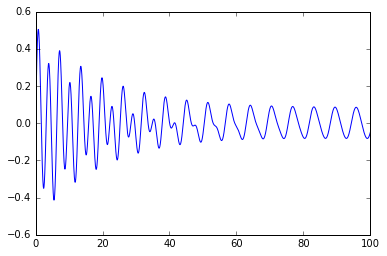

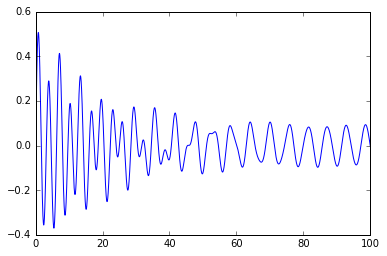

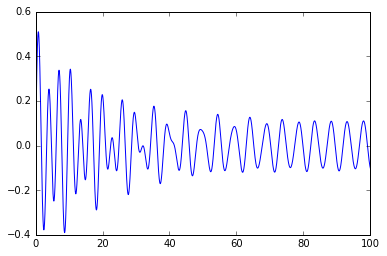

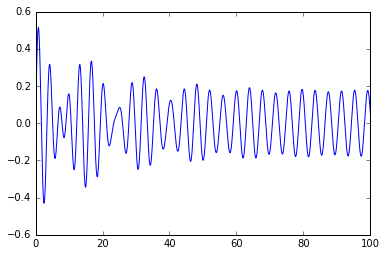

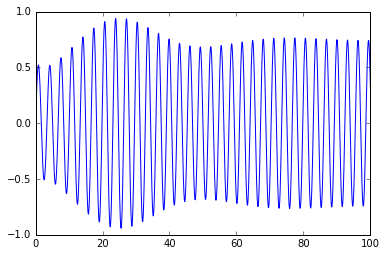

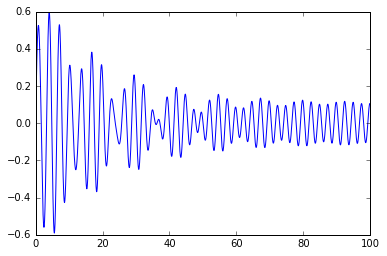

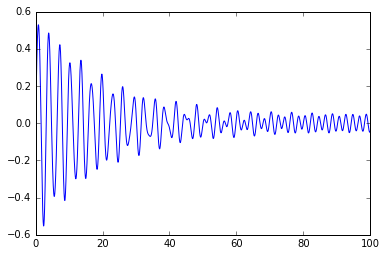

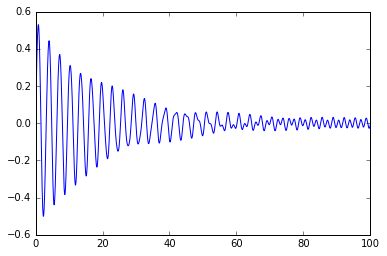

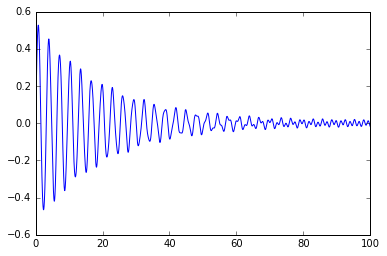

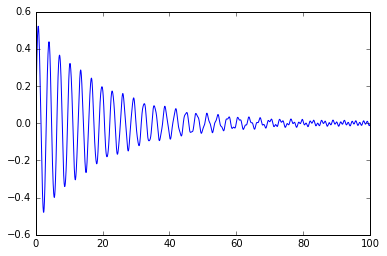

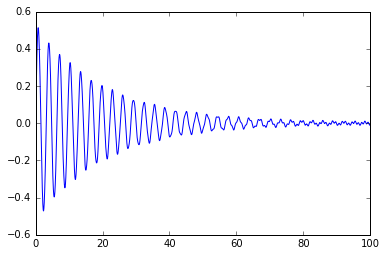

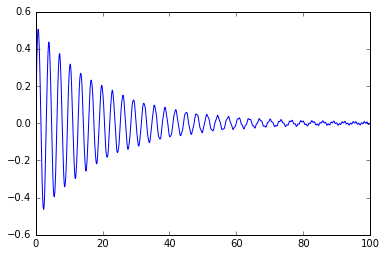

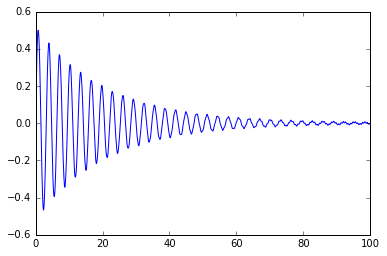

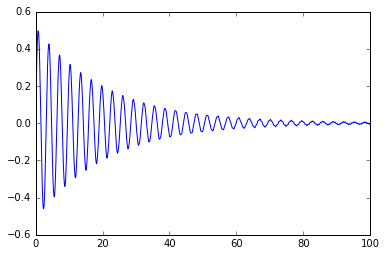

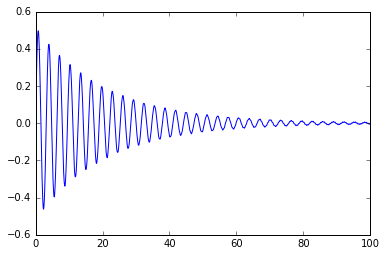

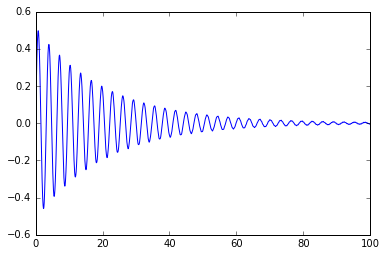

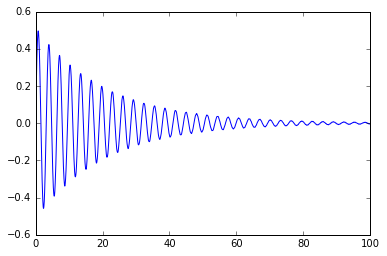

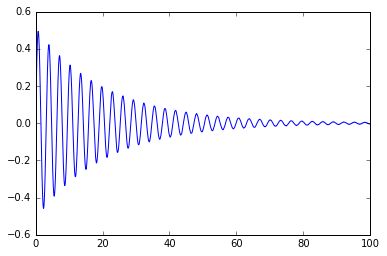

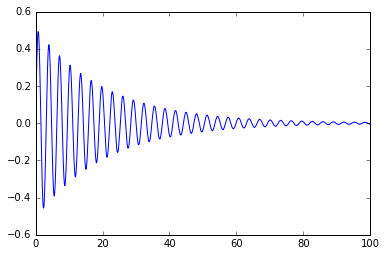

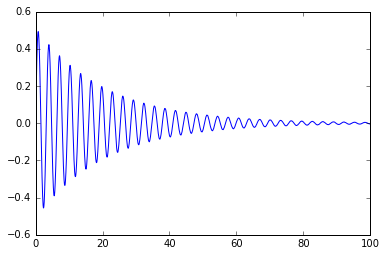

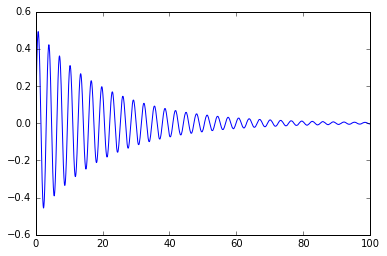

In [77]:
s = arange(1.,3.1,0.1)
w=1
for i in range(len(s)): 
    w=w+i*0.1
    sol = euler(w,dfuncion1,ddfuncion1,[0,0,1],100,0.001)
    plot(sol[0],sol[1])
    show()

In [89]:
def taylor2(b,dfuncion,ddfuncion,dddfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + dfuncion(b,z[i], y[i], tiempos[i])*h + 0.5*ddfuncion(b,z[i], y[i], tiempos[i])*(h**2) #para solucion x, donde dfuncion es la derivada de x
        z[i+1] = z[i] + ddfuncion(b,z[i], y[i], tiempos[i])*h + 0.5*dddfuncion(b,z[i], y[i], tiempos[i])*(h**2)#para la derivada v, y 'funcion' es la derivada de v
    solucion = [tiempos,y]
    return solucion

Las gráficas que se mostarán corresponden a los valores de $\omega$: 1, 1.1, 1.2, 1.3 ... en orden descendente respectivamente (la primera gráfica para 1, la segunda para 1.1, etc)

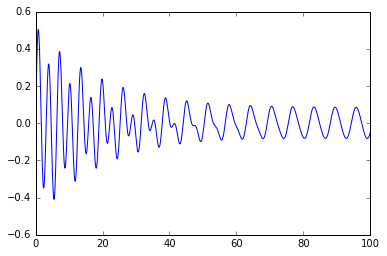

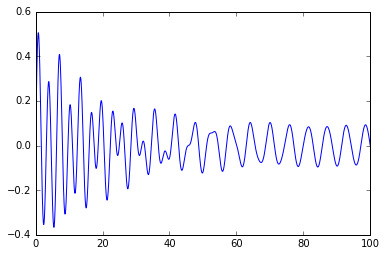

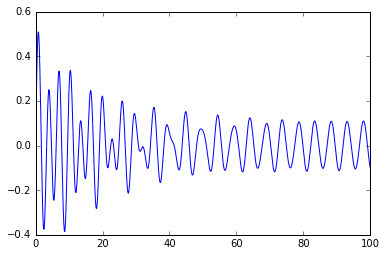

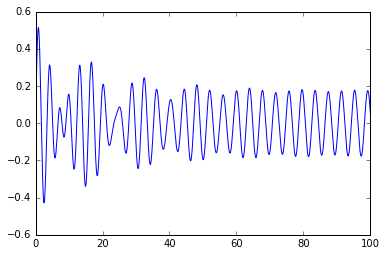

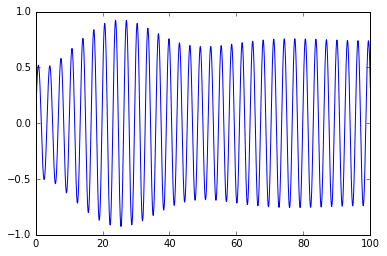

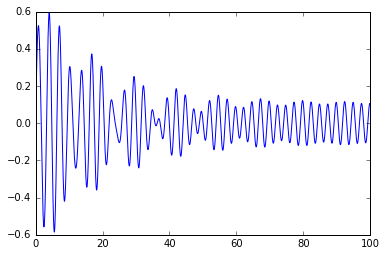

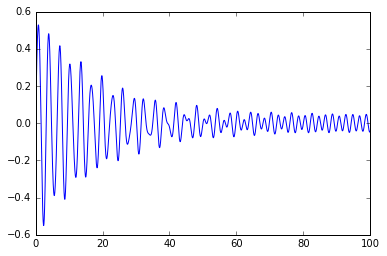

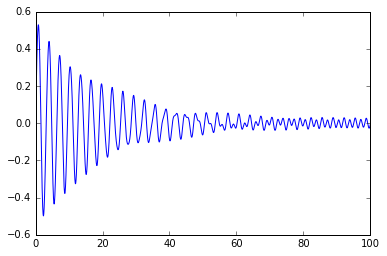

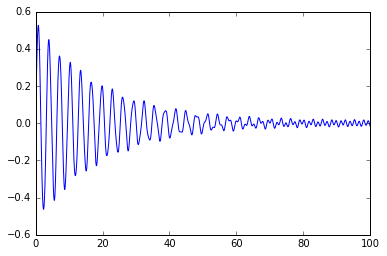

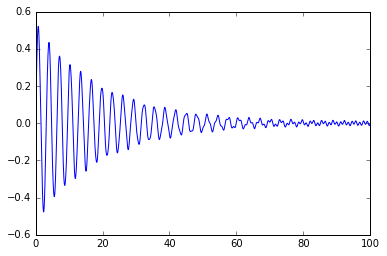

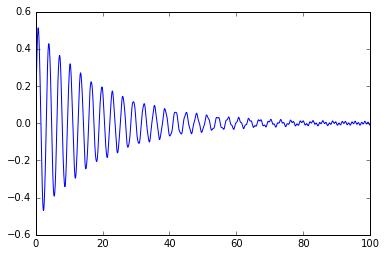

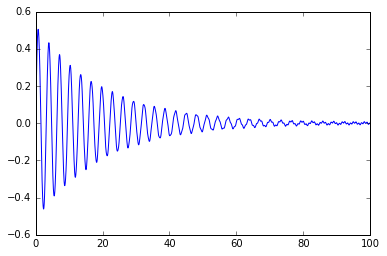

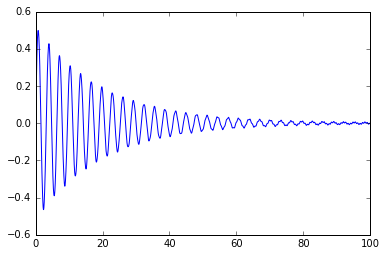

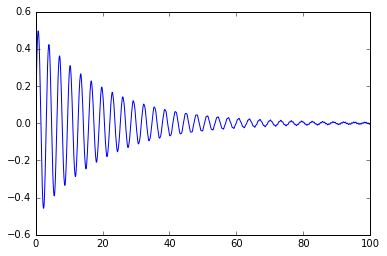

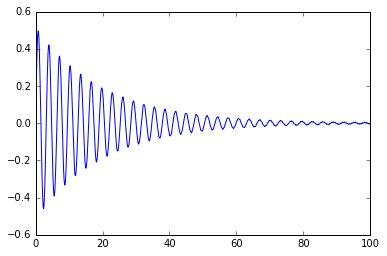

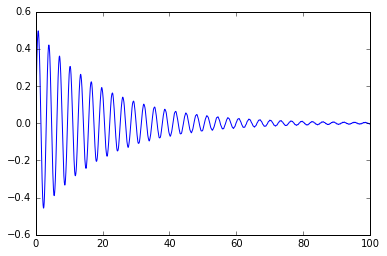

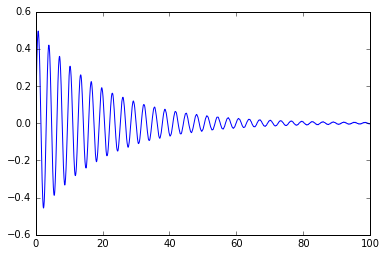

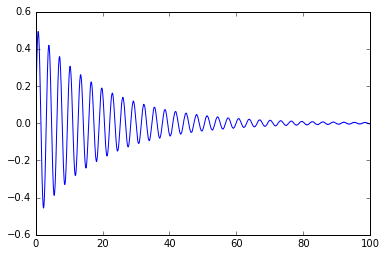

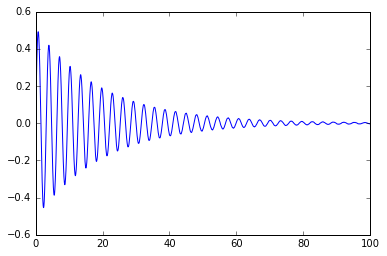

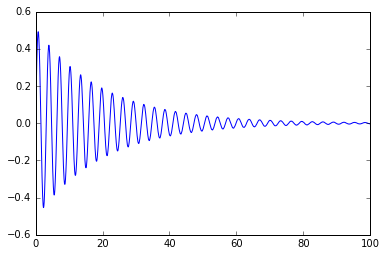

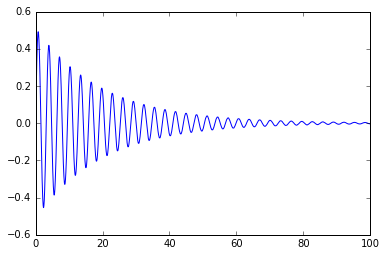

In [94]:
s = arange(1.,3.1,0.1)
w=1
for i in range(len(s)): 
    w=w+i*0.1
    sol = taylor2(w,dfuncion1,ddfuncion1,dddfuncion1,[0,0,1],100,0.001)
    plot(sol[0],sol[1])
    show()

In [95]:
def rk2(b,dfuncion,ddfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + (h/2)*(dfuncion(b,z[i], y[i],tiempos[i]) + dfuncion(b,z[i],y[i] + h*dfuncion(b,z[i],y[i],tiempos[i]), tiempos[i+1])) #para solucion x, donde dfuncion es la derivada de x        
        z[i+1] = z[i] + (h/2)*(ddfuncion(b,z[i],y[i],tiempos[i]) + ddfuncion(b,z[i], y[i] + h*ddfuncion(b,z[i],y[i],tiempos[i]), tiempos[i+1]))
    solucion = [tiempos,y]
    return solucion

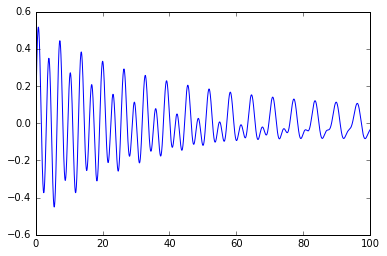

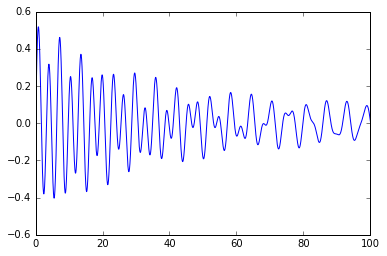

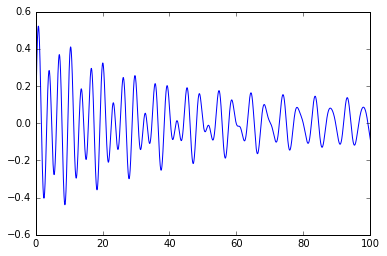

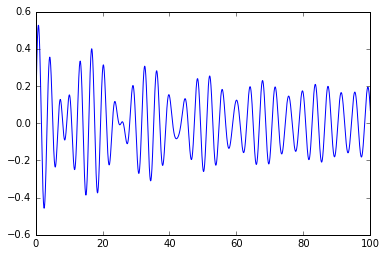

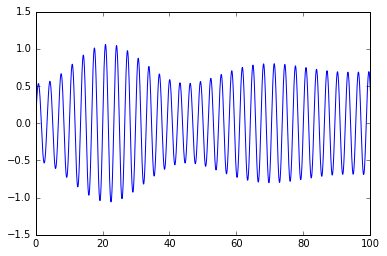

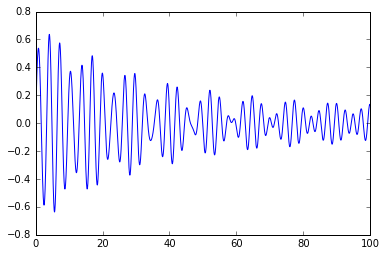

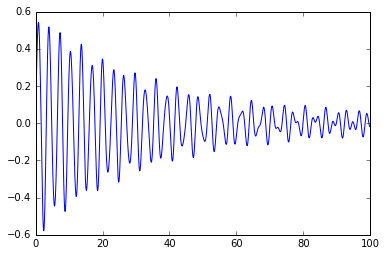

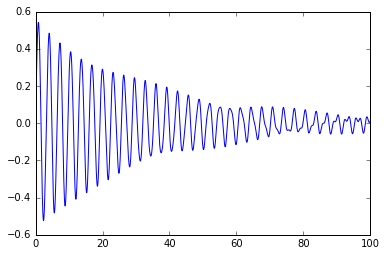

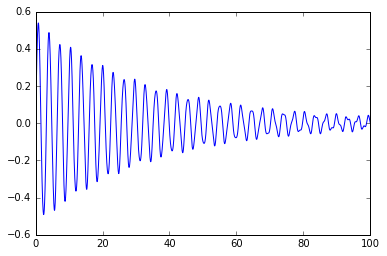

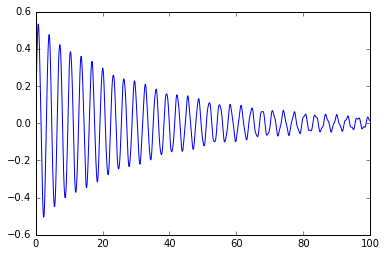

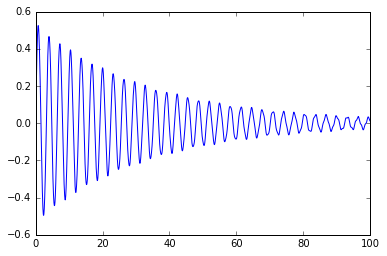

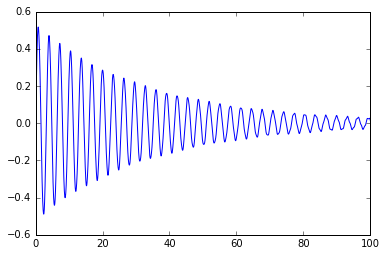

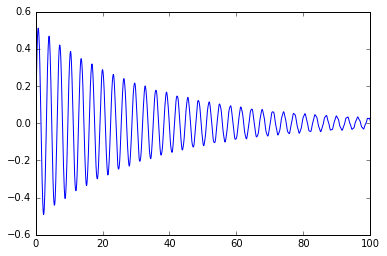

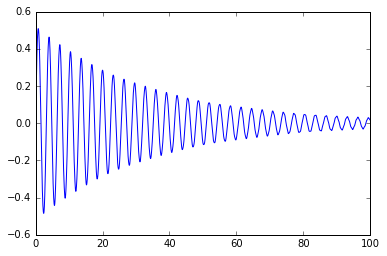

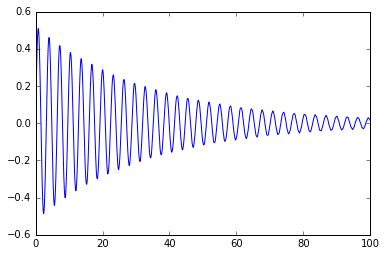

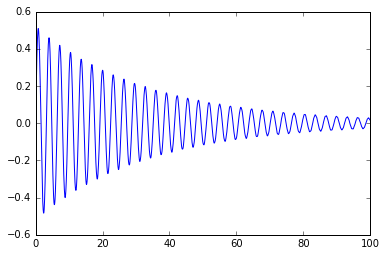

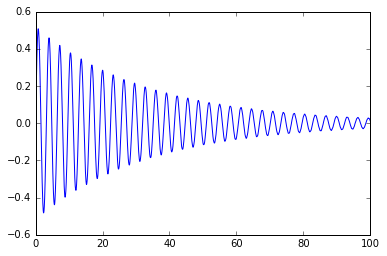

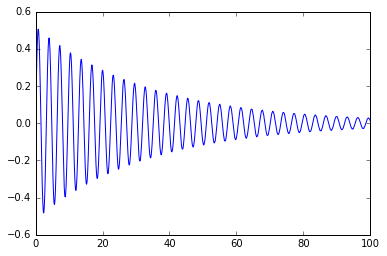

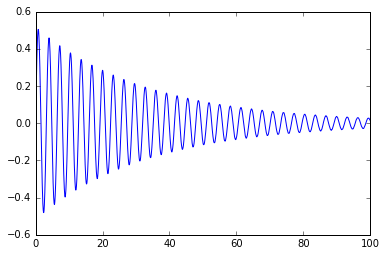

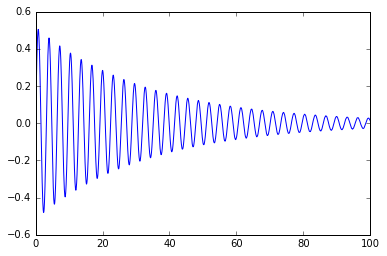

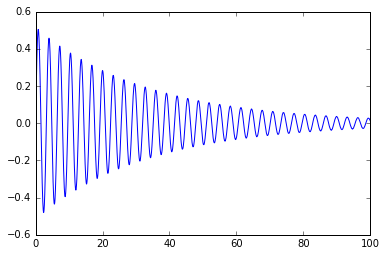

In [104]:
s = arange(1.,3.1,0.1)
w=1
for i in range(len(s)): 
    w=w+i*0.1
    sol = rk2(w,dfuncion1,ddfuncion1,[0,0,1],100,0.01) #nótese que es un paso más pequeño para agilizarlo
    plot(sol[0],sol[1])
    show()

In [81]:
def rk4(b,funcion,devfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    for i in range(len(tiempos)-1):
        k1 = h*funcion(b,z[i],y[i],tiempos[i])
        k2 = h*funcion(b,z[i],y[i] + k1/2, tiempos[i] + h/2)
        k3 = h*funcion(b,z[i],y[i] + k2/2, tiempos[i] + h/2)
        k4 = h*funcion(b,z[i],y[i] + k3, tiempos[i] + h)
        y[i+1] = y[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4) #para solucion x, donde dfuncion es la derivada de x        
        q1 = h*devfuncion(b,z[i],y[i],tiempos[i])
        q2 = h*devfuncion(b,z[i],y[i] + q1/2, tiempos[i] + h/2)
        q3 = h*devfuncion(b,z[i],y[i] + q2/2, tiempos[i] + h/2)
        q4 = h*devfuncion(b,z[i],y[i] + q3, tiempos[i] + h)
        z[i+1] = z[i] + (1/6)*(q1 + 2*q2 + 2*q3 + q4)
    solucion = [tiempos,y]
    return solucion

Las gráficas que se mostarán corresponden a los valores de $\omega$: 1, 1.1, 1.2, 1.3 ... en orden descendente respectivamente (la primera gráfica para 1, la segunda para 1.1, etc)

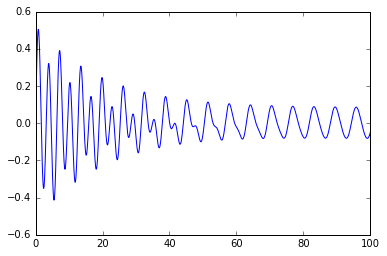

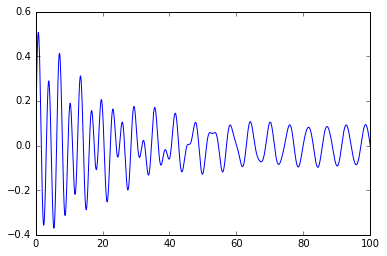

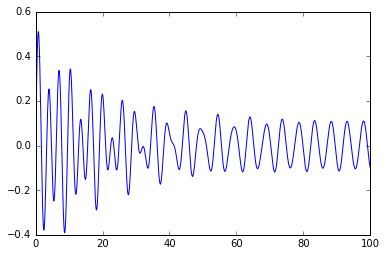

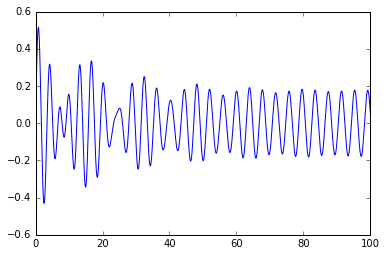

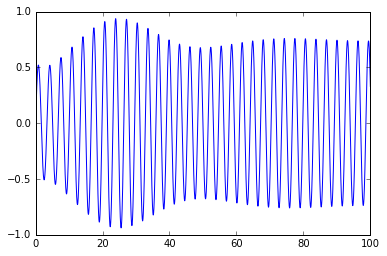

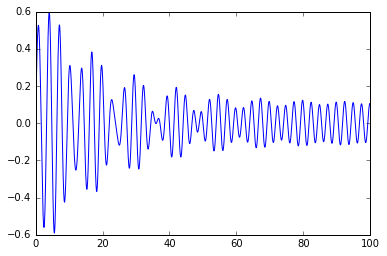

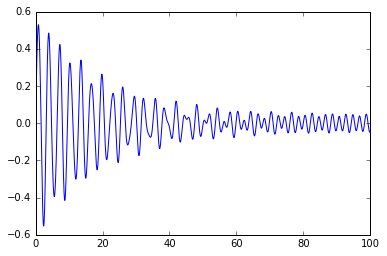

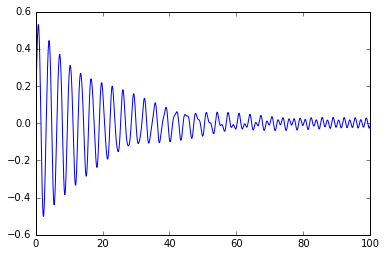

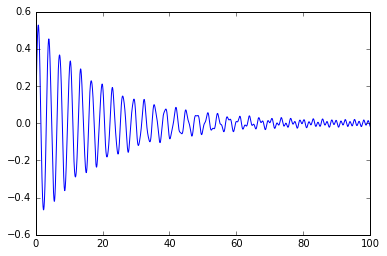

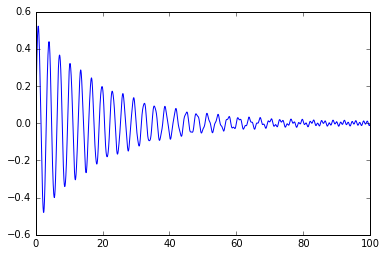

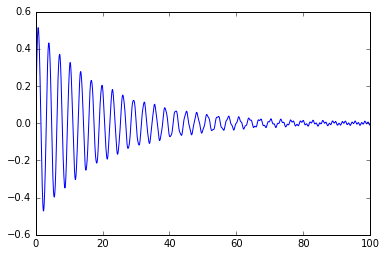

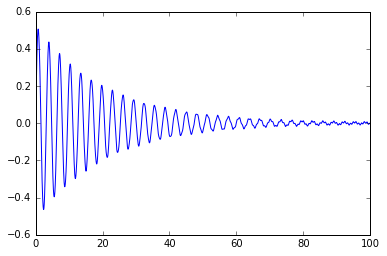

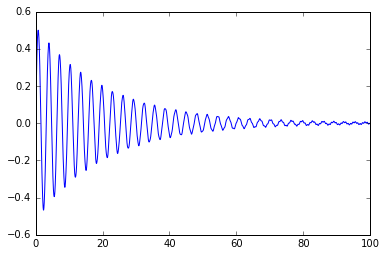

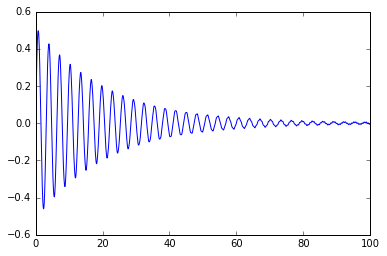

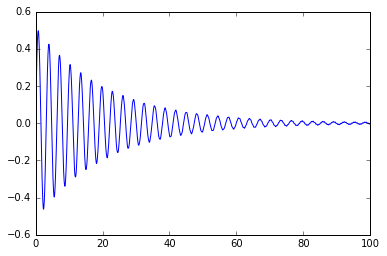

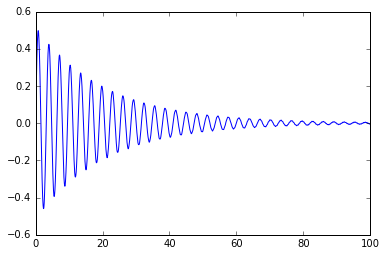

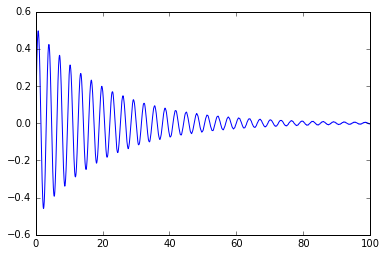

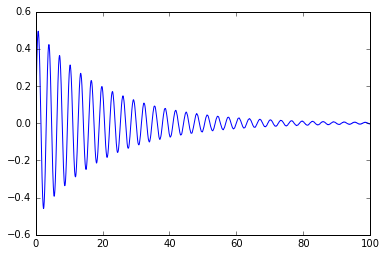

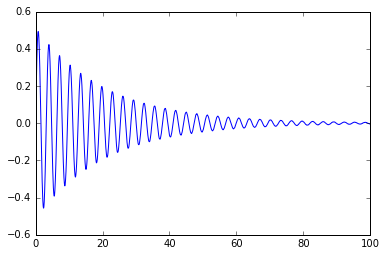

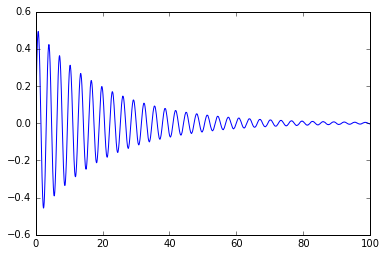

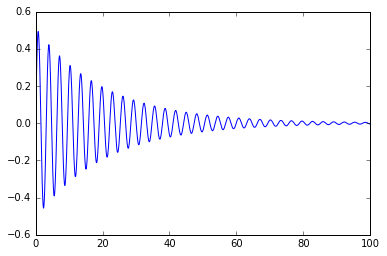

In [105]:
s = arange(1.,3.1,0.1)
w=1
for i in range(len(s)): 
    w=w+i*0.1
    sol = rk4(w,dfuncion1,ddfuncion1,[0,0,1],100,0.001)
    plot(sol[0],sol[1])
    show()

De todos los resultados que se mostraron a partir de los integradores, se observa que, si se interpreta físicamente, es el movimiento de un objeto como oscilador armónico amortiguado, pero se observa que en todas las gráficas se llega a una oscilación constante que perdura para $t$ grandes, es decir que el impulso externo logra superponerse a las fuezas que detienen al oscilador. Por otro lado, para valores de $\omega$ grande se observa que la amplitud de esta oscilación armónica final para $t$ grandes es cada vez menor. 